<a href="https://colab.research.google.com/github/thibj/Deep-Learning-HW/blob/main/DeepLearningHomework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II: Deep Learning and Applications
# Homework 1

**Due date: Feb 28**

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook [here](https://forms.gle/cy7s6xan4Rvzy35D9). Please **enable editing or comments** so that you can receive feedback from TAs.

Install PyTorch and TorchVision.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install -q torch torchvision torchtext

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision import transforms

## 1. Tensor Operations (30 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x1 = torch.unsqueeze(x,1)
x= torch.unsqueeze(x1,3)
print(x.size())
# Remove the two dimensions just added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = x.squeeze()
print(x.size())
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x= x.view(6)
print(x.size())
print("x dimension =",x.dim())

torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
torch.Size([6])
x dimension = 1


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.


# Use torch.stack to generate such a z
z = torch.stack([x,y], dim = 0)
print("z size =",z.size())
print(z[0,:,:])
print(z[1,:,:])


# Use torch.cat and torch.unsqueeze to generate such a z
x = torch.unsqueeze(x,0)
y = torch.unsqueeze(y,0)
z = torch.cat([x,y], dim=0)
z.size()

z size = torch.Size([2, 3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])


torch.Size([2, 3, 2])

### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

Finally, explain as a comment in one or two sentence what the differences between the following functions are:
```
torch.Tensor.view()
torch.Tensor.expand()
torch.Tensor.reshape()
torch.Tensor.repeat()
```

###**Answer**
tensor.expand() returns a new view with singleton dimensions without allocate new memory, rather tensor.repeat() repeat this tensor along specified dimension no matter singleton or not, and this function copies data and allocate new memory.

reshape() can operate on both contiguous and non-contiguous tensor while view() can only operate on contiguous tensor. Besides, torch.view merely creates a view of the original tensor. The new tensor will always share its data with the original tensor. This means that if you change the original tensor, the reshaped tensor will change and vice versa.

In [ ]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:] = x, z[1,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.unsqueeze(x,0)
print(x.size())
# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand(2,3)
print(z.size())
z


torch.Size([1, 3])
torch.Size([2, 3])


tensor([[1., 2., 3.],
        [1., 2., 3.]])

### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [ ]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k] is the mean value of the k-th row of x.
x_mean= torch.mean(x,1)
print( x_mean)
print(x_mean.size())
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum= torch.sum(x,1)
print( x_sum)
print(x_sum.size())
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max =  torch.max(x,1)
print("x_max= ",x_max)


# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = torch.min(x,1)
print("x_min = ",x_min)
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_top of size (10, 5), and x_top[k, :] is the top-5 values of the k-th row of x.
x_top = torch.topk(x,5,1)
print("x_top = ", x_top)

tensor([ 0.1017, -0.0553,  0.0883, -0.1677,  0.2051,  0.1892,  0.1831, -0.1031,
        -0.0831,  0.1103])
torch.Size([10])
tensor([ 5.0849, -2.7670,  4.4139, -8.3834, 10.2552,  9.4587,  9.1530, -5.1575,
        -4.1531,  5.5135])
torch.Size([10])
x_max=  torch.return_types.max(
values=tensor([1.4795, 3.1946, 1.6367, 1.9999, 3.5981, 1.9967, 2.9317, 1.7371, 2.2959,
        2.2121]),
indices=tensor([20, 44, 31, 48, 38,  4, 12, 30, 11, 39]))
x_min =  torch.return_types.min(
values=tensor([-1.6687, -2.1380, -1.8972, -2.9268, -1.5814, -2.2337, -2.9910, -2.2846,
        -2.3067, -2.0769]),
indices=tensor([17,  3, 10,  8,  1, 13, 37, 13,  2, 26]))
x_top =  torch.return_types.topk(
values=tensor([[1.4795, 1.4168, 1.3810, 1.2790, 1.2586],
        [3.1946, 1.8052, 1.3295, 1.2865, 1.2425],
        [1.6367, 1.5804, 1.4229, 1.3306, 1.1798],
        [1.9999, 1.7934, 1.2946, 1.2723, 1.1525],
        [3.5981, 2.7071, 2.6501, 1.6244, 1.3164],
        [1.9967, 1.9305, 1.7633, 1.5174, 1.4923],
        [2

# 5) More complicated operations on tensors

In deep learning we often want to only change part of a tensor, or only gather values from specific indices. For these purposes, we often use ```torch.gather``` or ```torch.scatter```, see their definition [here](https://pytorch.org/docs/stable/tensors.html?highlight=scatter#torch.Tensor.scatter). 

Note that you **do not have to** use these functions and some parts of the question may not require them.

In [ ]:
ind = torch.randint(50,(10,50))
x = torch.randn(10,50,50)

# select for all i,j the values x[i,j,k] where ind[i,j] = k in a tensor
# the tensor should have shape (10,50)

# double for all i,j the values x[i,j,k] where ind[i,j] = k leaving all other values in x untouched
# the returned tensor should have shape (10,50,50)

ind = ind[:, 0]
# select the values from x[i,l,j] where l = ind[k] for all i,j,k
# the returned tensor should have shape (10,10,50)

## Convolutional Neural Networks (40 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`.

For this question, we split the train data into training (80%) and validation (20%) for hyperparameter tuning.

In [ ]:
t= torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=t)
test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download=True, transform=t)

N = len(train_dataset)
indices = np.arange(N)
np.random.shuffle(indices)
n = int(0.8 * N)
print('{} for training,\t{} for validation'.format(n, N-n))
train_indices = indices[:n]
valid_indices = indices[n:]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_indices)

# train a model
# DO NOT MODIFY
def train(model, dataloader, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for X, y in dataloader:
        logits = model(X.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, y.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, y.cuda()).sum().item()
        total_prediction += y.size(0)
    return total_loss / len(dataloader), total_correct / total_prediction

# evaluate a model
# DO NOT MODIFY
def evaluate(model, dataloader, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            logits = model(X.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, y.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, y.cuda()).sum().item()
            total_prediction += y.size(0)
    return total_loss / len(dataloader), total_correct / total_prediction

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
40000 for training,	10000 for validation


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

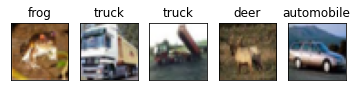

In [ ]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train_dataset.labels = [train_dataset.classes[target] for target in train_dataset.targets]
plot(train_dataset.data, train_dataset.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # implement parameter definitions here
  
  def forward(self, images):
    # implement the forward function here
    return None

#### b) Tune hyperparameters

Train the CNN model on CIFAR-10 dataset. Tune the number of channels (in CNN), optimizer, learning rate and the number of epochs for best validation accuracy.

In [ ]:
# tune the optimizer type and hyperparameters with the following code as an example
batch_size = 128
lr = 1e-4
EPOCHS = 30

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
valid_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# call your model here
model = CNN(...)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# train and test the model
# you can reuse the following coding block for hyperparameter tuning
# feel free to try more advanced training strategies
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())


TypeError: ignored

Write down **validation accuracy** of your model under different hyperparameter settings.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |       |       |
| (256, 256, 256)                     |       |       |
| (512, 512, 512)                     |       |       |


### 2) Full CNN implementation

Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.

#### a) Implement max pooling layers

Copy the CNN implementation in previous question. Implement max pooling layers.

In [ ]:
class CNN_MaxPool(nn.Module):
  def __init__(self):
    super(CNN_MaxPool, self).__init__()
    # implement parameter definitions here
  
  def forward(self, images):
    # implement the forward function here
    return None

#### b) Tune hyperparameters

Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.

In [ ]:
# implement hyperparameters and training here


Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
|-------------------------|---------------------|
| (128, 128, 128)         |                     |
| (128, 256, 512)         |                     |
| (256, 256, 256)         |                     |
| (256, 512, 1024)        |                     |
| (512, 512, 512)         |                     |
| (512, 1024, 2048)       |                     |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.

In [ ]:
# evaluate the model here
# train the model on the training set, find the best model/hyperparameter with validation set, and apply this best model on the test set

model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_dataloader, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

How much **test accuracy** do you get?

**Your Answer:**

What can you conclude for the design of CNN structure?

**Your Answer:**

## Recurrent Neural Networks (40 points)

Next, let's use PyTorch to implement a recurrent neural network for sentiment analysis, i.e., classifying sentences into given sentiment labels, including positive, negative and neutral.

We use a benckmark dataset (i.e., SST) for this task. First, let's download the SST dataset, and do some preprocessing to build vocabulary and split the dataset into training/validation/test sets. Also, let's define the training and evaluation function. Please do not modify the functions.

In [ ]:
import torch
from torch import nn
from torch import optim
import torchtext
from torchtext import data
from torchtext import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# load data splits
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# build dictionary
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 128

# build iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data), 
    batch_size=32)

# train a model
# DO NOT MODIFY
def train(model, iterator, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        logits = model(batch.text.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, batch.label.cuda())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
        total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

# evaluate a model
# DO NOT MODIFY
def evaluate(model, iterator, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            logits = model(batch.text.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, batch.label.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
            total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

Next, we are ready to build our RNN model for sentiment analysis. In the following code, we have provided several hyperparameters we needed for building the model, including vocabulary size (vocab_size), the word embedding dimension (embedding_dim), the hidden layer dimension (hidden_dim), the number of layers (num_layers) and the number of sentence labels (label_size). Please fill in the missing code, and implement a RNN model, after reading the guidance in the last [blocks](https://colab.research.google.com/drive/1pjPN4gsKzrPNmPehOe3sR1rd1bGt31Pg#scrollTo=PbqSAz90zBYi).

In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 1

        # add the layers required for sentiment analysis.
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, padding_idx=padding_idx)

    def zero_state(self, batch_size): 
        # implement the function, which returns an initial hidden state.
        return None

    def forward(self, text):
        # implement the forward function of the model.
        embedding = self.embedding(text)
        return None

Finally, we are ready to train the model and compute the accuracy.

In [ ]:
# tune the optimizer type and hyperparameters with the following code as an example
batch_size = 128
lr = 1e-4
EPOCHS = 30

# call your model here
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
optimizer = optim.SGD(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
model.cuda()
criterion.cuda()

# train and test the model
# you can reuse the following coding block for hyperparameter tuning
# feel free to try more advanced training strategies
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_iter, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())

Once we find the best hyperparameters for the validation set, we can now evaluate our model on the test set.

In [ ]:
# evaluate the model here
# train the model on the training set, find the best model/hyperparameter with validation set, and apply this best model on the test set

model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_iter, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

### 1) Implement the RNN model

The current code of the RNN model is not complete, so let's first complete the code to implement a standard RNN model by filling in the [block](https://colab.research.google.com/drive/1pjPN4gsKzrPNmPehOe3sR1rd1bGt31Pg#scrollTo=kWUKPgDGNQSr&line=2&uniqifier=1).

- **Subtask 1-1: Creating all the Required Layers in Your Model**

Remember that when building a deep learning model, we first need to complete the **init** function by creating all the required layers. In our case, since we are using RNNs for sentence classification, we need an embedding layer to transform words into word embeddings, a RNN layer to transform word embeddings into sentence encodings, an activation function, and a linear layer as well as a softmax function for sentence classification.

Based on that, please create all the necessary layers of your RNN model in the **init** function. Note that we have already added the word embedding layer for you.

- **Subtask 1-2: Implementing the Function for Initializing Hidden States**

Remember that when applying a RNN unit to transform word embeddings into sentence encodings, the RNN unit starts from an initial hidden vector with all zero values, and sequentially reads each word to update the hidden vector. Finally, the hidden vector obtained after reading the last word is treated as the sentence encoding.

In this step, please implement the **zero_state** function, which returns a batch of initial hidden vectors given a batch size. Hint: your function should return a tensor with all the values being zero, and you may refer to the [official document](https://pytorch.org/docs/stable/nn.html#rnn) for the correct shape of the tensor.

- **Subtask 1-3: Implementing the Forward Function**

Finally, we are ready to build the forward function, which takes a batch of sentences as inputs and returns a batch of logits. To be more specific, the input is given by the tensor called $\text{text}$, and the size of the tensor is $(B, L)$, with $B$ being the batch size, $L$ being the maximum length of sentences in this batch and $\text{text}[i, j]$ being the integer id of the $j$-th word in the $i$-th sentence. Given this tensor as input, your forward function should return a logit tensor of size $(B, C)$, with $B$ being the batch size and $C$ being the number of possible classes.

Please implement the forward function based on the above instructions. Note that we have already applied the word embedding layer to the text input, and obtained a tensor called $\text{embedding}$, and the size of the tensor is $(B, L, D)$, where $D$ is the word embedding dimension. You can directly operate on the $\text{embedding}$ tensor to compute the logits.

### 2) Compare Different Optimizers

In the previous task, we have implemented a RNN model for sentiment analysis, or more generally sentence classification.

To better understand several concepts in deep learning, let's do some ablation studies by using the model we have just implemented.

The first task is to try different optimizers for your model, where for each optimizer, you may also try different options of learning rate. 


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     |      |      |      |      |
| Adam    |      |      |      |      |
| RMSprop |      |      |      |      |

- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

*Your Answer:*


### 3) Compare the Results under Different Epoches

In this task, we hope to compare the results of our model with different numbers of training epochs, and answer the question.

- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model with different numbers of training epochs.

|                    |  10  |  20  |  30  |  40  |  50  |
|--------------------|------|------|------|------|------|
| Training Accuracy  |      |      |      |      |      |
| Validation Accuracy|      |      |      |      |      |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

*Your Answer:*

### 4) Compare Different Model Capacities/Configurations

In practice, we may also vary the capacity of our model to find the optimal choice. In this part, please try different configurations of your model, which have different model capacities. Based on your observation, please also answer the question.

- **Subtask 4-1: Completing the Table**

Please write down the **validation accuracy** of your model under different model capacities (i.e., specified by the word embedding dimension and the hidden layer dimension).

|Embedding dim / Hidden dim |  64  |  128  |  256 |
|---------------------------|------|-------|------|
| 64                        |      |       |      |
| 128                       |      |       |      |
| 256                       |      |       |      |

- **Subtask 4-2: Answering the Question**

Is it always better to increase model capacity in this case? Is it always better to increase model capacity in general? How to decide on the proper model capacity in practice?

*Your Answer:*
